https://www.kaggle.com/c/titanic-gettingStarted

Note: You'll need to make an account to access the data.

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
# Preview of the data
titanic_df.head()
#SibSp - Siblings on board
#Parch - Parents or Children on board
#Lot of Cabin information missing (first letter is the deck)
#Embarked - SCQ stands for cities

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Overall info on the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


First some basic questions:
<br>
<br>
    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    <br>
    2.) What deck were the passengers on and how does that relate to their class?
    <br>
    3.) Where did the passengers come from?
    <br>
    4.) Who was alone and who was with family?
<br>
Then we'll dig deeper, with a broader question:
<br>
    5.) What factors helped someone survive the sinking?
<br>
So let's start with the first question: Who were the passengers on the titanic?

In [5]:
# Imports for Analysis and Visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

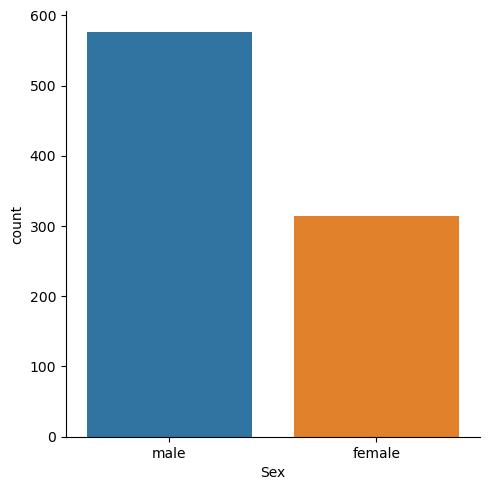

In [6]:
#First question: Who were the passengers on the Titanic?
# Gender counts
sns.catplot(x='Sex', data=titanic_df, kind='count')

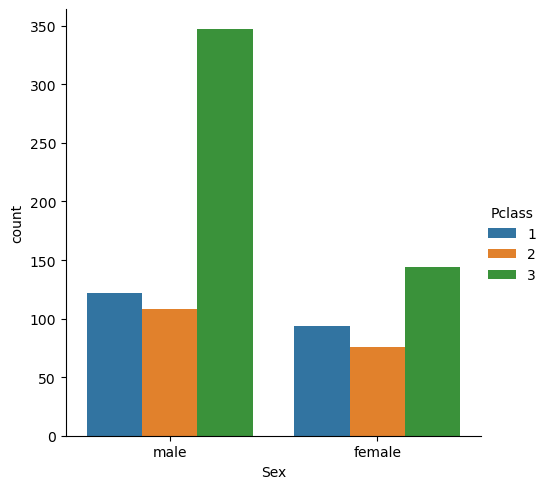

In [7]:
# Separate Gender counts by classes (using hue!)
sns.catplot(x='Sex', data=titanic_df, hue='Pclass', kind='count')

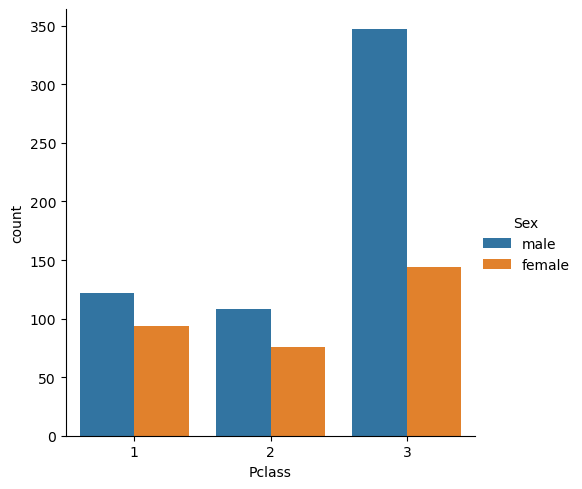

In [8]:
# Here's an easier comparison of classes counts between the two genders
sns.catplot(x='Pclass', data=titanic_df, hue='Sex', kind='count')
# MUCH more 3rd class males than females

In [9]:
# Funciton for passengers to determine if they were male, female or child
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
# Getting the values from the dataframe with a list and applying the function 
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
# remember to specify axis=1 for columns and not index

In [11]:
# Preview to see if function worked
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


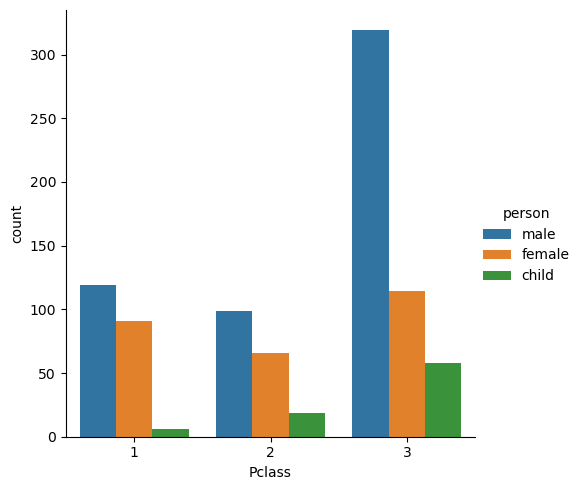

In [12]:
sns.catplot(x='Pclass', data=titanic_df, hue='person', kind='count')

<AxesSubplot:>

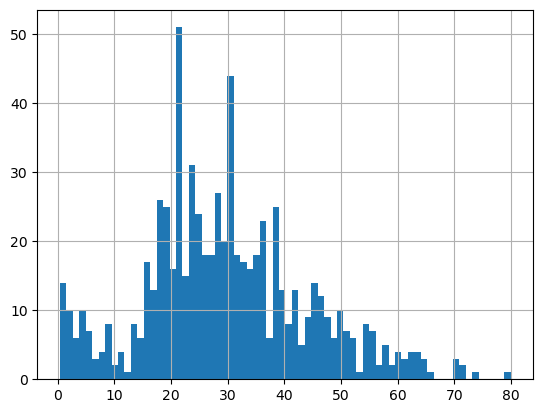

In [13]:
# Distribution of the ages with a histogram
titanic_df['Age'].hist(bins=70)

In [14]:
# Average ages of passengers on the Titanic
titanic_df['Age'].mean()

29.69911764705882

In [15]:
# Number of each female, male or child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

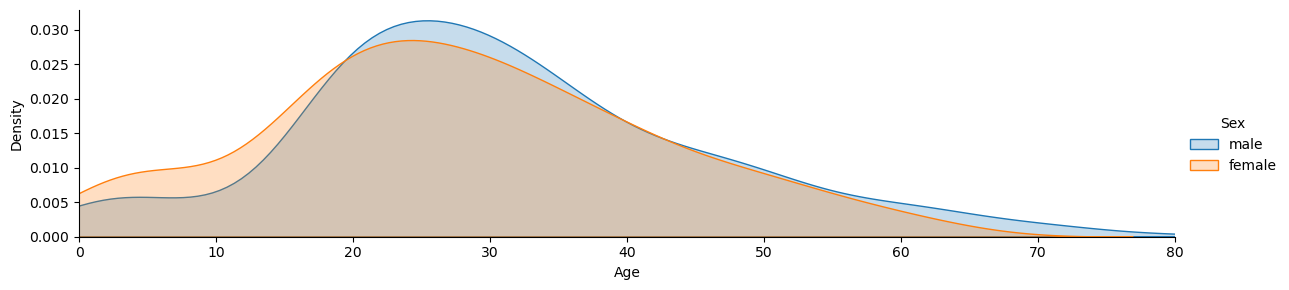

In [16]:
# FacetGrid to plot multiple KDE plots on one plot
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
# Mapped kde plots to the Age column
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

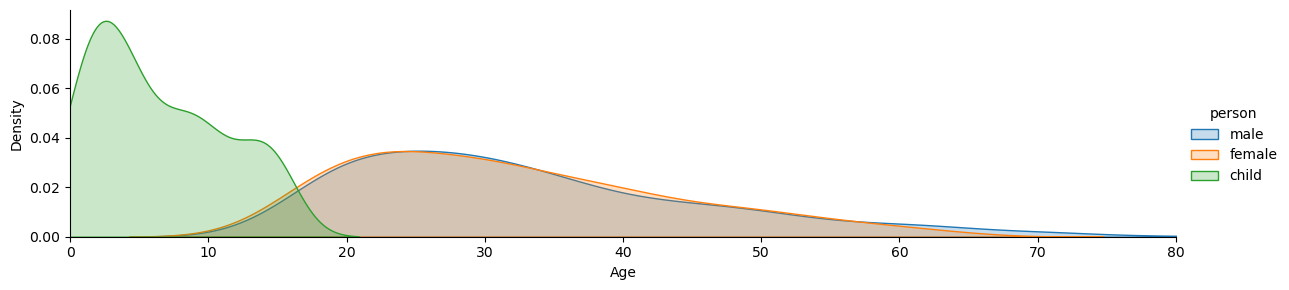

In [17]:
# Include Children!
# FacetGrid to plot multiple KDE plots on one plot
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
# Mapped kde plots to the Age column
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()
# Remember child cuts off at 16, so the shaded region after that is just the KDE's bandwidth

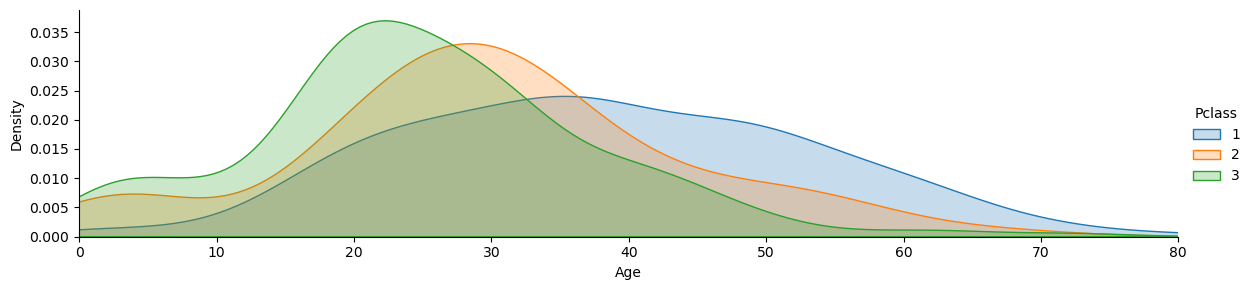

In [18]:
# See how age ranges across classes
# FacetGrid to plot multiple KDE plots on one plot
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
# Mapped kde plots to the Age column
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

 Now we have a pretty good breakdown of the passengers who were in the Titanic, so now on to the next question:
 <br>
 What deck were the passengers on and how does that relate to their class?

In [19]:
# Preview the dataset once again and notice that Cabin contains deck info, but also contains a lot of null values
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
# Drop null values in Cabin column
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

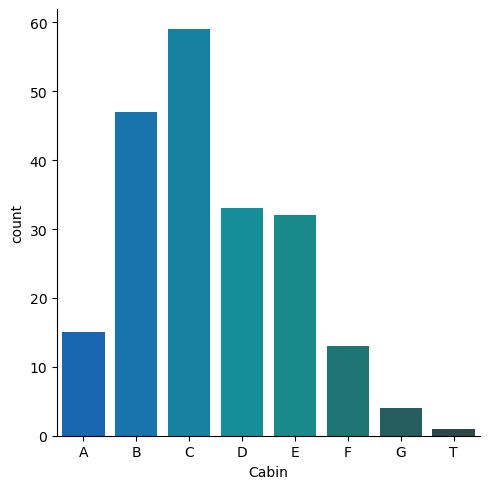

In [22]:
# Only need the first letter to get the Deck Level
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

# Counts of each known passenger on a deck level
sns.catplot(x='Cabin', data=cabin_df, palette='winter_d', kind='count', order=['A','B','C','D','E','F','G','T'])
# Palette is just a range of a color map + _d making it darker

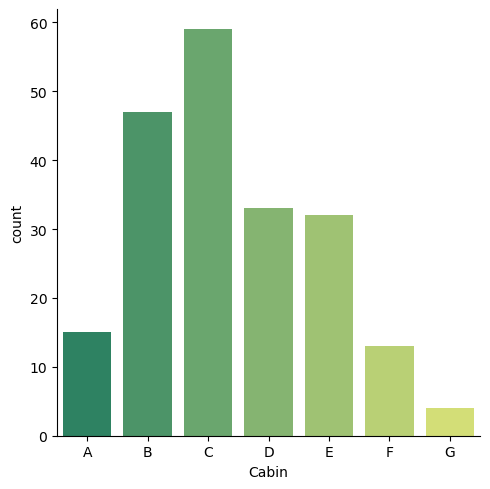

In [23]:
# Omit T since it is an extraneous value
cabin_df = cabin_df[cabin_df.Cabin != 'T']

# Counts of each known passenger on a deck level
sns.catplot(x='Cabin', data=cabin_df, palette='summer', kind='count', order=['A','B','C','D','E','F','G'])

In [24]:
# Note the Embarked column, values of C,Q and S - Port of embarkment is C = Cherbourg, Q = Queenstown, S = Southampton
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


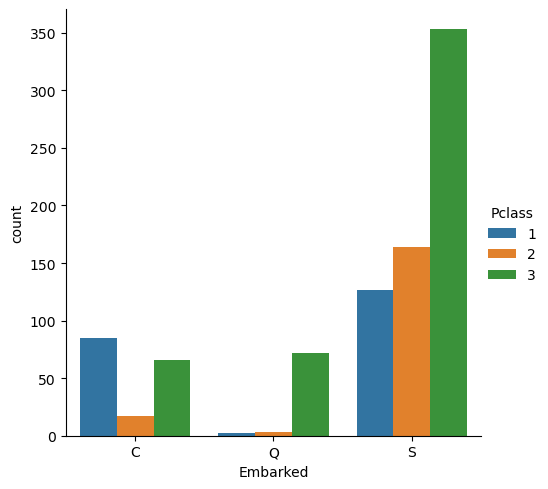

In [25]:
# See what city people came from, and see if it made a difference on what class they were
sns.catplot(x='Embarked', data=titanic_df, hue='Pclass', order=['C','Q','S'], kind='count')

In [26]:
# Who was alone and who was with family?
titanic_df.head()
# Use the SibSp and Parch columns to see who was alone/with family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [27]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [28]:
# Any value that's zero is alone
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [29]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = "With Family"
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = "Alone"

C:\Users\eugen\AppData\Local\Temp\ipykernel_20008\3817102322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = "With Family"


In [30]:
# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'
# See if it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


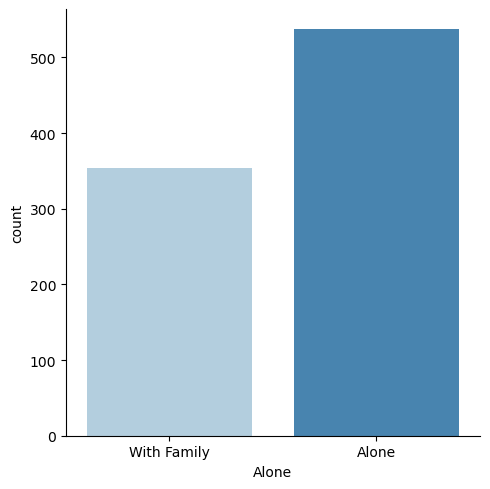

In [31]:
sns.catplot(x='Alone', data=titanic_df, palette='Blues', kind='count')

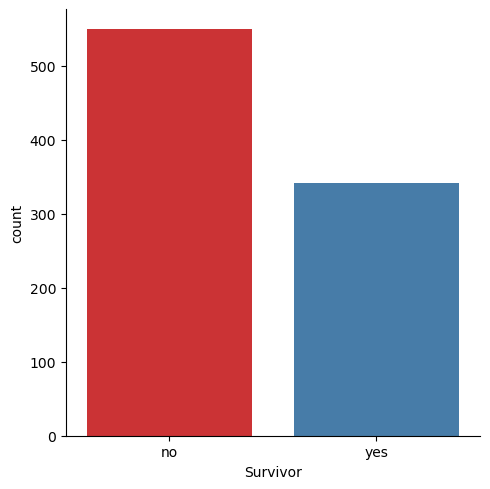

In [32]:
# What factors helped someone survive the sinking/crashing of the Titanic?
titanic_df['Survivor'] = titanic_df['Survived'].map({0:'no',1:'yes'})

sns.catplot(x='Survivor', data=titanic_df, palette='Set1', kind='count')

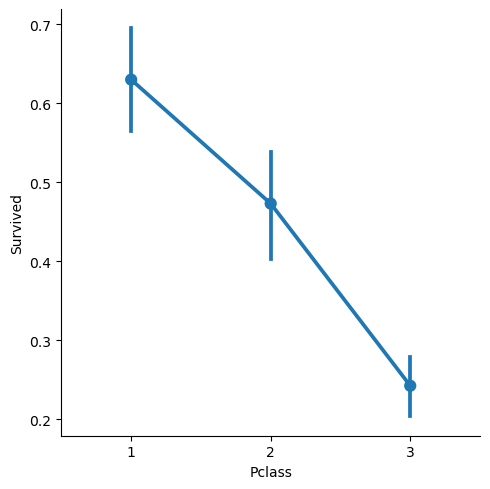

In [33]:
# Now see if class made a difference in surviving
sns.catplot(x='Pclass',y='Survived', data=titanic_df, kind='point')
# See that 3rd class had a WAY lower survivor rate, but seen previously the 3rd class had a much larger amount of males
# "Women and children first" would affect the 3rd class most in survival rate if just comparing through class

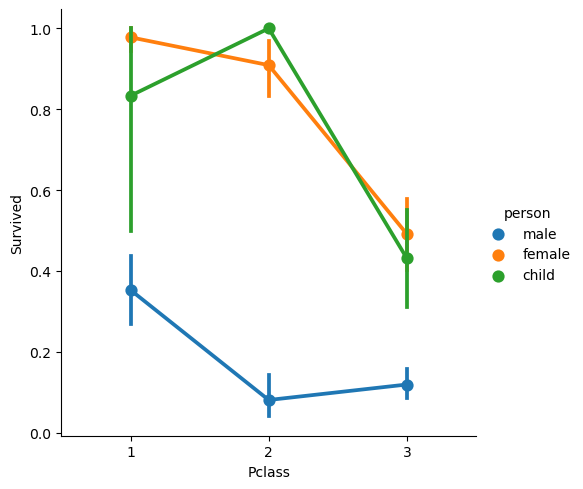

In [34]:
# NOW Adjust for class and gender
sns.catplot(x='Pclass', y='Survived', hue='person', data=titanic_df, kind='point')
# Here we can see that being a male or lower class definitely didn't help survival rate 
# Result of being a male dramatically decreased the survival rate

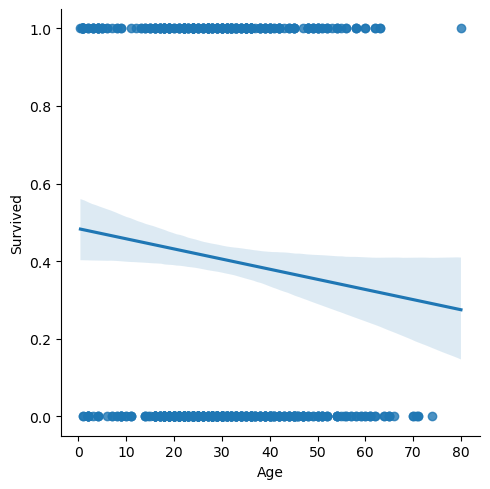

In [35]:
# Was age a factor?
sns.lmplot(x='Age', y='Survived', data=titanic_df)
# General trendline shows that the older a person was there were less likely to have survived

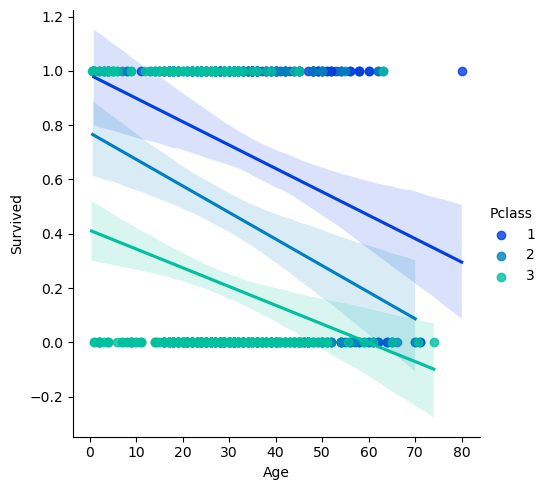

In [36]:
# Use hue to compare age and class to see if they were factors in survival
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter')

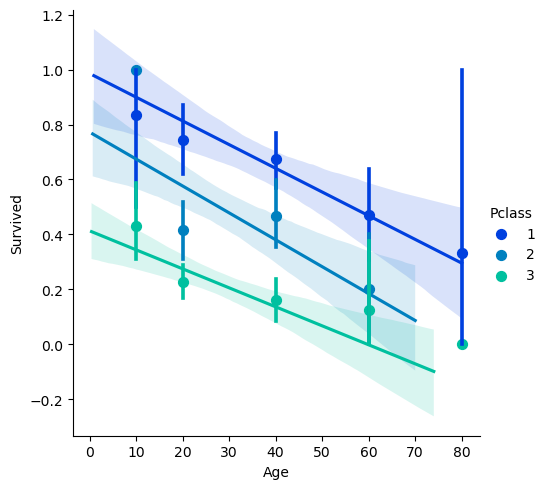

In [37]:
# From the trends it can be seen that theres still disparity in the percentage of classes who survived
# Clean up the graph using xbins
generations = [10,20,40,60,80]
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='winter', x_bins=generations)

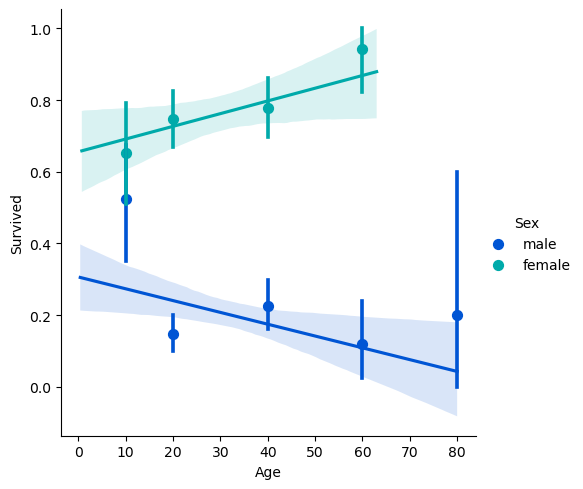

In [38]:
# See how Gender and Age affected survival
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='winter', x_bins=generations)
# Can see if you were an older female you'd have a much higher survival rate vs an older male

In [39]:
# More questions to answer
# Did having a family member increased the odds of surviving the crash?

In [40]:
# Did the deck have an effect on the passenger survival rate? Did this answer match up with your intuition?
# Make a copy of titanic_df that had only non-NA cabin values and change cabin to only be the first letter

In [41]:
# Only drop NA values in cabin
deck_survival_df = titanic_df.dropna(subset='Cabin') 

In [42]:
deck_survival_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes


In [43]:
# Only need the first value in Cabin to know what deck the passenger was in
# Also drop deck level 'T' since it is extraneous
deck_survival_df['Deck'] = deck_survival_df['Cabin'].str[:1]
deck_survival_df = deck_survival_df[deck_survival_df.Deck != 'T']

C:\Users\eugen\AppData\Local\Temp\ipykernel_20008\3724798148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deck_survival_df['Deck'] = deck_survival_df['Cabin'].str[:1]


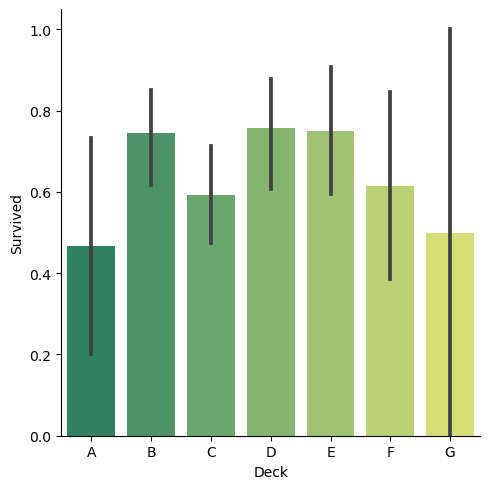

In [44]:
sns.catplot(x='Deck', y='Survived', data=deck_survival_df, palette='summer', kind='bar', order=['A','B','C','D','E','F','G'])
# Deck didn't seem to have much of an effect on survival rate

In [45]:
# Did having a family member increased the odds of surviving the crash?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


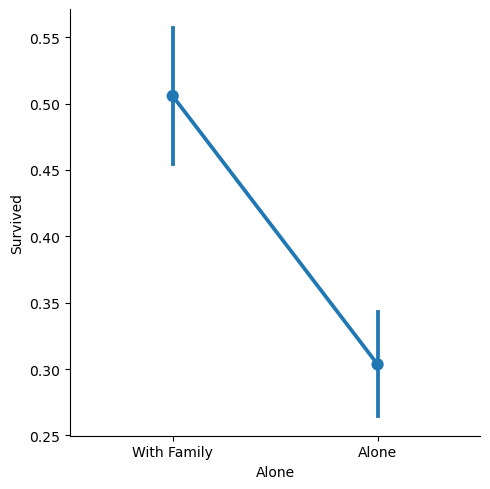

In [46]:
sns.catplot(x='Alone', y='Survived', data=titanic_df, kind='point')
#Having family definitely did seem to affect the rate of survival, but what if we adjust for gender?

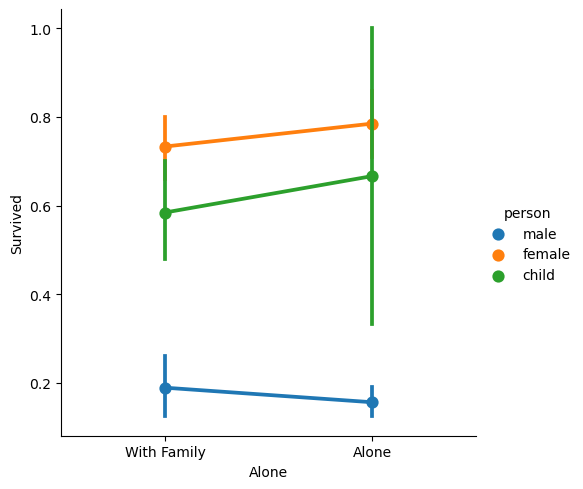

In [47]:
sns.catplot(x='Alone', y='Survived', hue='person', data=titanic_df, kind='point')
# Males whether with family or alone seemed to have a lower survival rate
# It seems like children or females who were alone had a slightly higher survivor rate